In [15]:
!pip install pandas matplotlib seaborn


In [16]:
import sqlite3

# Function to create a connection to the SQLite database
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(f"SQLite version: {sqlite3.version}")
    except sqlite3.Error as e:
        print(e)
    return conn

# Function to create the transactions table
def create_table(conn):
    create_table_sql = """
    CREATE TABLE IF NOT EXISTS transactions (
        id INTEGER PRIMARY KEY,
        date TEXT NOT NULL,
        type TEXT NOT NULL,
        category TEXT NOT NULL,
        amount REAL NOT NULL,
        description TEXT
    );"""
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except sqlite3.Error as e:
        print(e)

# Create the database and table
database = "finance.db"
conn = create_connection(database)
if conn is not None:
    create_table(conn)
    conn.close()


SQLite version: 2.6.0


In [18]:
# Function to add a new transaction to the database
def add_transaction(conn, transaction):
    sql = ''' INSERT INTO transactions(date, type, category, amount, description)
              VALUES(?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, transaction)
    conn.commit()
    return cur.lastrowid

# Function to get all transactions from the database
def get_all_transactions(conn):
    cur = conn.cursor()
    cur.execute("SELECT * FROM transactions")
    return cur.fetchall()

# Function to search for transactions by category
def search_transactions_by_category(conn, category):
    cur = conn.cursor()
    query = "SELECT * FROM transactions WHERE category = ?"
    cur.execute(query, (category,))
    return cur.fetchall()


In [19]:
# Example transactions to add
transactions_to_add = [
    ('2024-05-20', 'Income', 'Salary', 5000.00, 'Monthly salary'),
    ('2024-05-21', 'Expense', 'Groceries', -150.50, 'Weekly groceries'),
    ('2024-05-22', 'Expense', 'Entertainment', -50.00, 'Movie night'),
    ('2024-05-23', 'Income', 'Freelance', 200.00, 'Freelance project'),
    ('2024-05-24', 'Expense', 'Utilities', -100.00, 'Electricity bill')
]

# Connect to the database and add transactions
conn = create_connection(database)
if conn is not None:
    for transaction in transactions_to_add:
        add_transaction(conn, transaction)
    conn.close()


SQLite version: 2.6.0


In [20]:
import pandas as pd

# Fetch all transactions into a DataFrame
conn = create_connection(database)
transactions_df = pd.read_sql_query("SELECT * FROM transactions", conn)
conn.close()

# Display the DataFrame
transactions_df


SQLite version: 2.6.0


,id,date,type,category,amount,description
0,1,2024-05-20,Income,Salary,5000.0,Monthly salary
1,2,2024-05-21,Expense,Groceries,-150.5,Weekly groceries
2,3,2024-05-22,Expense,Entertainment,-50.0,Movie night
3,4,2024-05-23,Income,Freelance,200.0,Freelance project
4,5,2024-05-24,Expense,Utilities,-100.0,Electricity bill


Total Income: $5200.0
Total Expenses: $-300.5


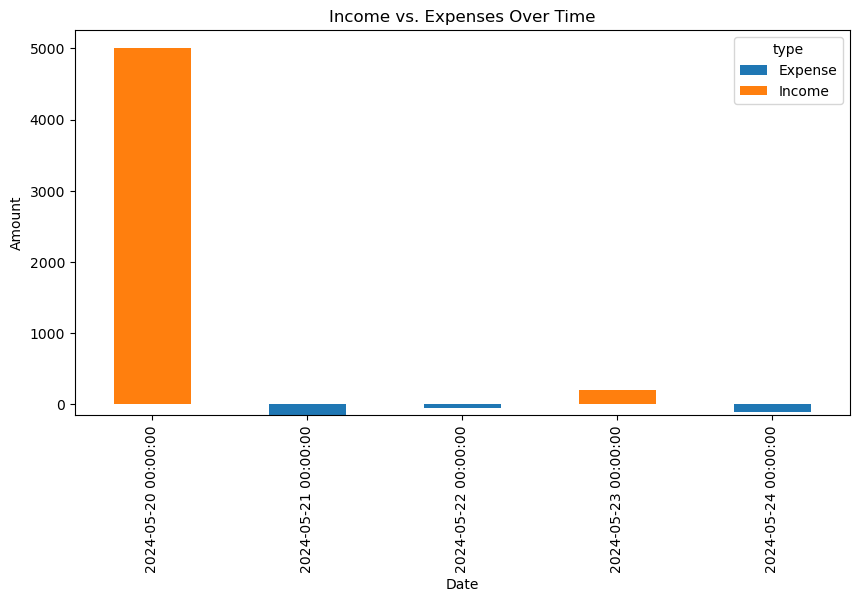

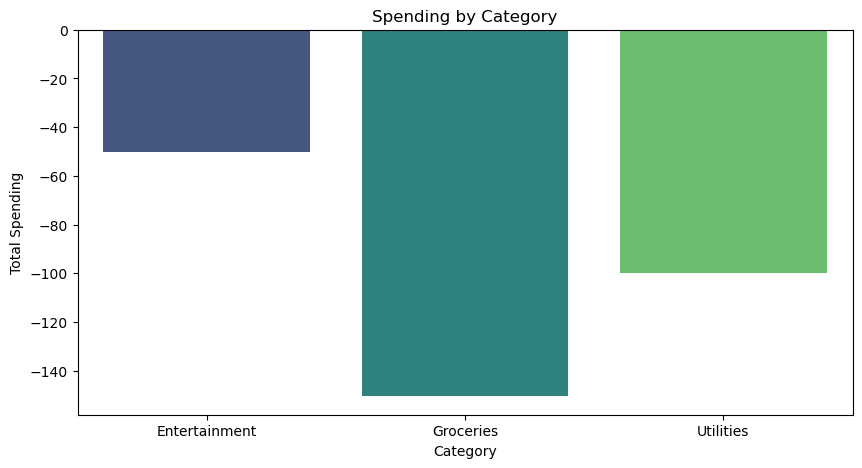

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis: Total income and expenses
total_income = transactions_df[transactions_df['type'] == 'Income']['amount'].sum()
total_expenses = transactions_df[transactions_df['type'] == 'Expense']['amount'].sum()

print(f"Total Income: ${total_income}")
print(f"Total Expenses: ${total_expenses}")

# Visualization: Income vs. Expenses over time
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
transactions_df.set_index('date', inplace=True)

# Plot: Income vs. Expenses over time
transactions_df.groupby(['date', 'type'])['amount'].sum().unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Income vs. Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

# Analysis: Spending by category
expense_by_category = transactions_df[transactions_df['type'] == 'Expense'].groupby('category')['amount'].sum()

# Plot: Spending by category
plt.figure(figsize=(10, 5))
sns.barplot(x=expense_by_category.index, y=expense_by_category.values, palette='viridis')
plt.title('Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.show()
